In [1]:
DEBUG = True
CONFIG_FILE = '/datascope/subaru/data/targeting/dSph/ursaminor/netflow/TEST/ursaminor_1_001/ga-netflow_20250228162427.config'
OUTPUT_PATH = '/datascope/subaru/data/targeting/dSph/ursaminor/netflow/TEST/ursaminor_1_001'

# Plot the target lists

Load the target lists and plot them.

In [2]:
import os, sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rc('font', size=6) #controls default text size

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
if DEBUG and 'debug' not in globals():
    import debugpy
    debugpy.listen(('0.0.0.0', int(os.environ['PFS_TARGETING_DEBUGPORT'])))
    debug = True

# Imports

In [6]:
import pfs.utils

from pfs.ga.targeting.scripts.netflow.notebooks.notebooks import *
from pfs.ga.targeting.instrument import *


# Load the netflow config file

In [7]:
# Load the configuration
config = load_netflow_config(CONFIG_FILE)

2025-02-28T13:08:42.363 30 cobraCoach setting invisible cobras: [173, 648, 799, 853, 949, 1173, 1653, 1724, 2182]
2025-02-28T13:08:42.399 30 cobraCoach setting bad cobras: [47, 50, 173, 193, 344, 347, 361, 443, 493, 648, 738, 754, 799, 821, 853, 949, 1150, 1173, 1208, 1210, 1303, 1460, 1494, 1520, 1539, 1580, 1637, 1653, 1724, 1790, 1791, 1792, 1825, 1836, 1882, 1903, 2053, 2182, 2352, 2380]
2025-02-28T13:08:42.406 20 cobraCoach cc connecting to fpga....
2025-02-28T13:08:42.409 30 butler     newRun: /tmp/cobra_coach/20250228_077


In [8]:
config.targets['fluxstd'].mask

# Load the target lists

In [9]:
print_target_list_config(config)

hsc sci $PFS_TARGETING_DATA/data/targeting/dSph/ursaminor/ursaminor_obs.feather
sky sky $PFS_TARGETING_DATA/data/targeting/dSph/ursaminor/sky_ursaminor.feather
fluxstd cal $PFS_TARGETING_DATA/data/targeting/dSph/ursaminor/fluxstd_ursaminor.feather
guide ag $PFS_TARGETING_DATA/data/targeting/dSph/ursaminor/guide_ursaminor.feather


In [10]:
target_lists = load_target_lists(config, OUTPUT_PATH)
len(target_lists)

2025-02-28T13:08:52.238 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `g`.


4

In [11]:
# List available photometry for each target list
print_photometry(target_lists)

hsc
  hsc
     g
     i
     nb515
sky
fluxstd
  ps1
     g
     r
     i
guide
  gaia
     g
     bp
     rp


In [12]:
target_lists['hsc'].data[target_lists['hsc'].data['targetid'] == 1292785176730][['targetid', 'priority']]

,targetid,priority
22608,1292785176730,1


# Plot target lists

In [13]:
if config.field.center is not None:
    center = config.field.center.get_pointing()
else:
    center = config.pointings[0].get_pointing()

if config.pointings is not None:
    pointings = [ p.get_pointing() for p in config.pointings ]
else:
    pointings = None

pointings, center

([Pointing(229.2000, 67.9000, posang=0.0000],
 Pointing(227.2854, 67.2225, posang=0.0000)

In [14]:
# Create the PFI instrument. This will load the instrument calibration data.
pfi = SubaruPFI(instrument_options=config.instrument_options)

2025-02-28T13:08:57.563 30 cobraCoach setting invisible cobras: [173, 648, 799, 853, 949, 1173, 1653, 1724, 2182]
2025-02-28T13:08:57.603 30 cobraCoach setting bad cobras: [47, 50, 173, 193, 344, 347, 361, 443, 493, 648, 738, 754, 799, 821, 853, 949, 1150, 1173, 1208, 1210, 1303, 1460, 1494, 1520, 1539, 1580, 1637, 1653, 1724, 1790, 1791, 1792, 1825, 1836, 1882, 1903, 2053, 2182, 2352, 2380]
2025-02-28T13:08:57.610 20 cobraCoach cc connecting to fpga....
2025-02-28T13:08:57.612 30 butler     newRun: /tmp/cobra_coach/20250228_078


/datascope/slurm/miniconda3/envs/dobos-torch/lib/python3.10/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "pmsafe" yielded 1 of "distance overridden (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
2025-02-28T13:09:00.197 30 targeting  Extinction correction is not available in catalog `hsc` for magnitude `g`.
2025-02-28T13:09:00.198 30 targeting  Extinction correction is not available in catalog `hsc` for magnitude `i`.
2025-02-28T13:09:00.200 30 targeting  Extinction correction is not available in catalog `hsc` for magnitude `i`.
/home/dobos/project/ga_targeting/python/pfs/ga/targeting/diagram/diagram.py:61: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  l = ax.scatter(x[mask][s], y[mask][s], color=color, c=c, s=size, **style)
/datascope/slurm/miniconda3/envs/dobos-torch/lib/python3.10/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "pmsafe" yielded 1 of "distance overridden (Note 6)"
  wa

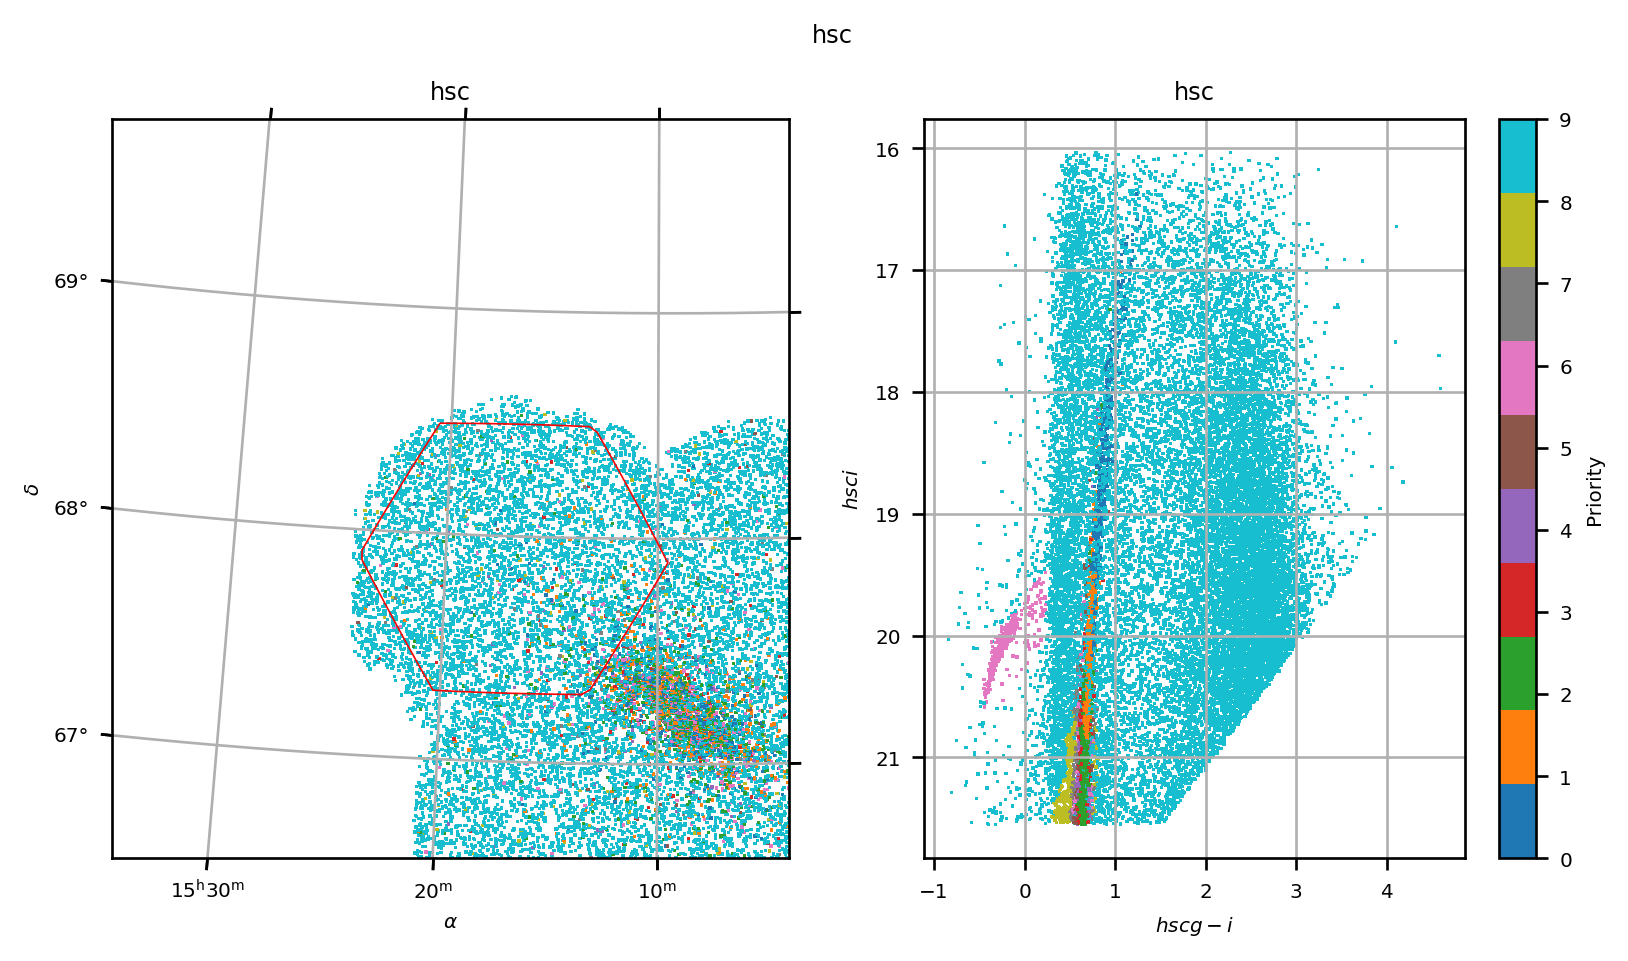

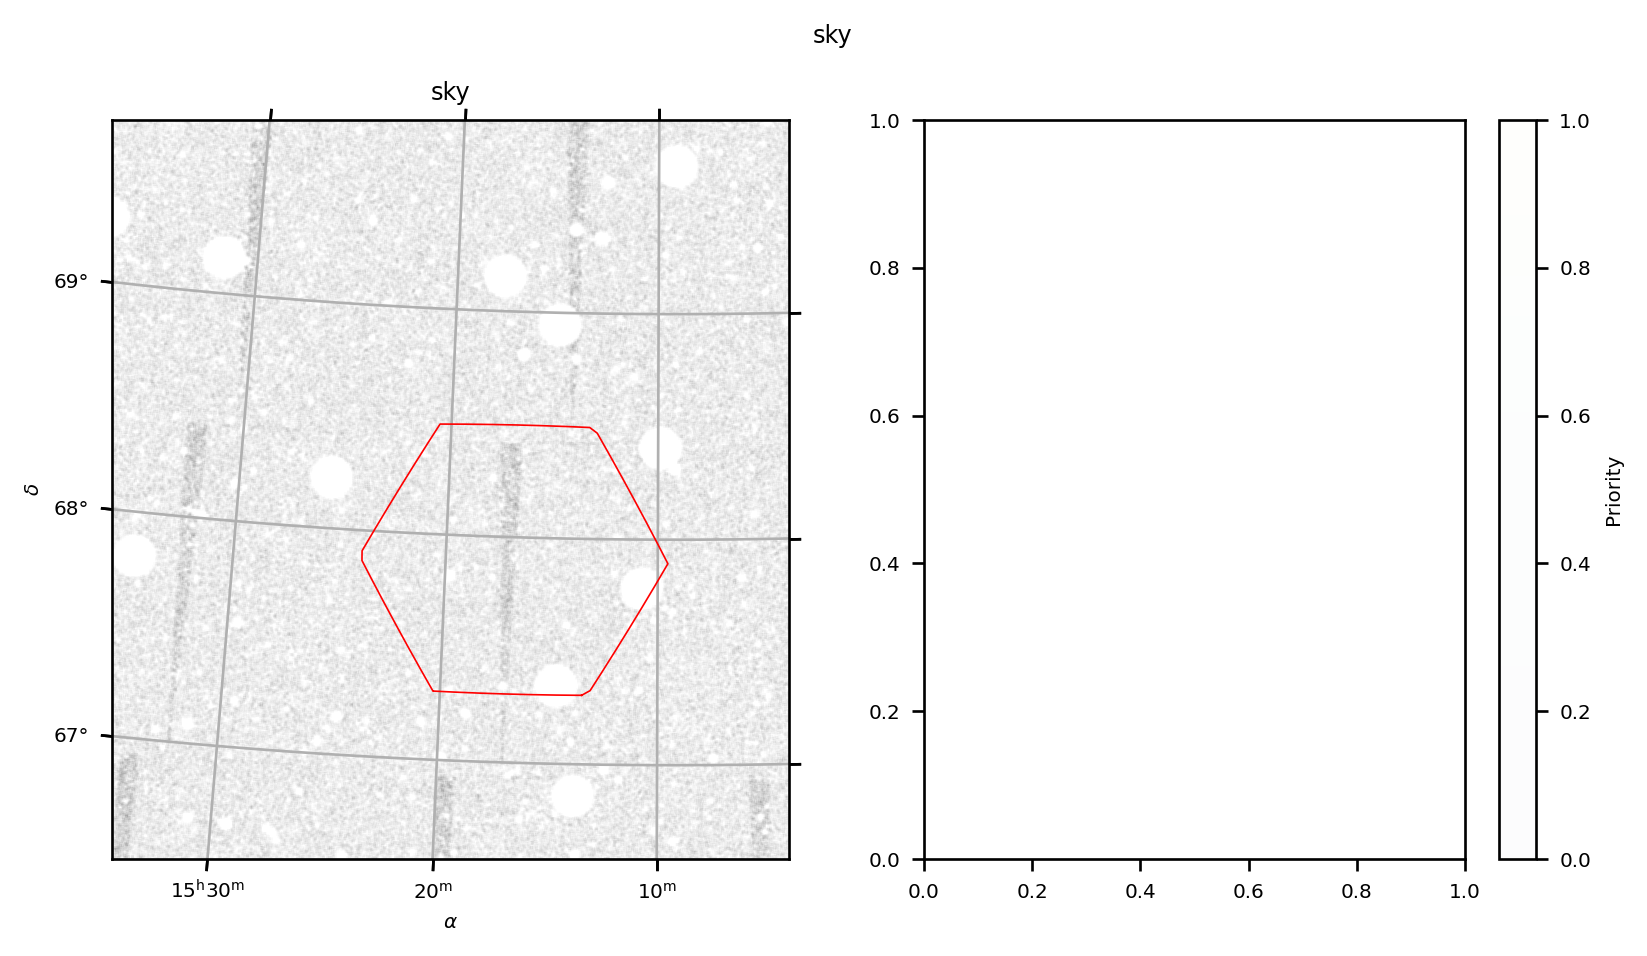

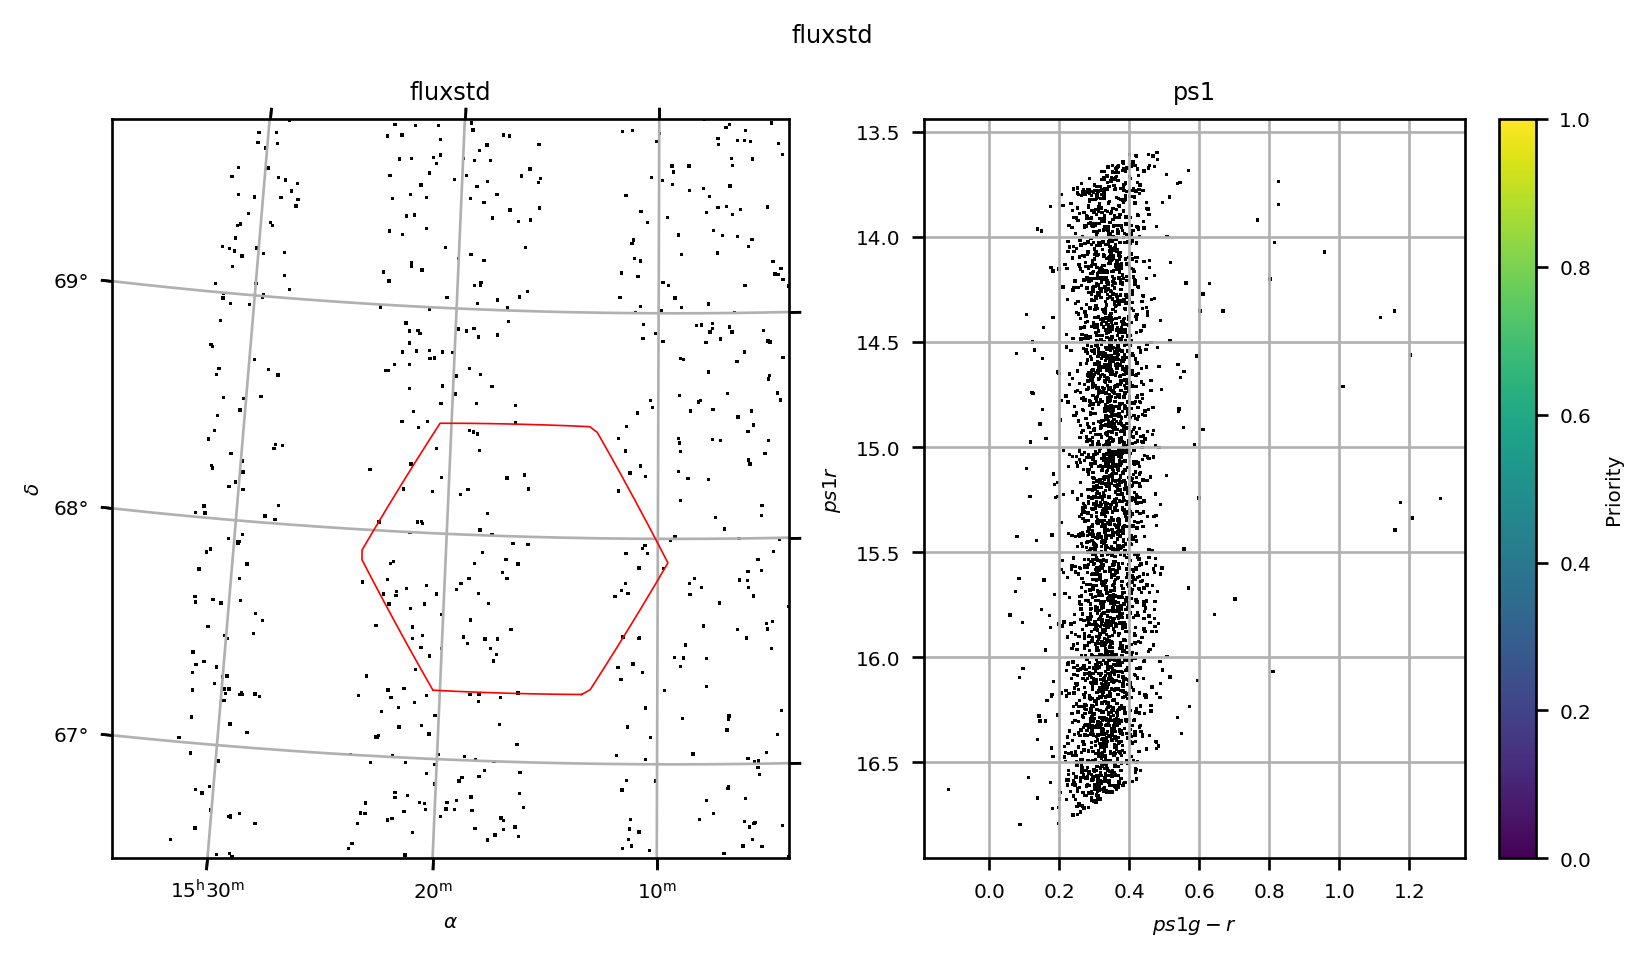

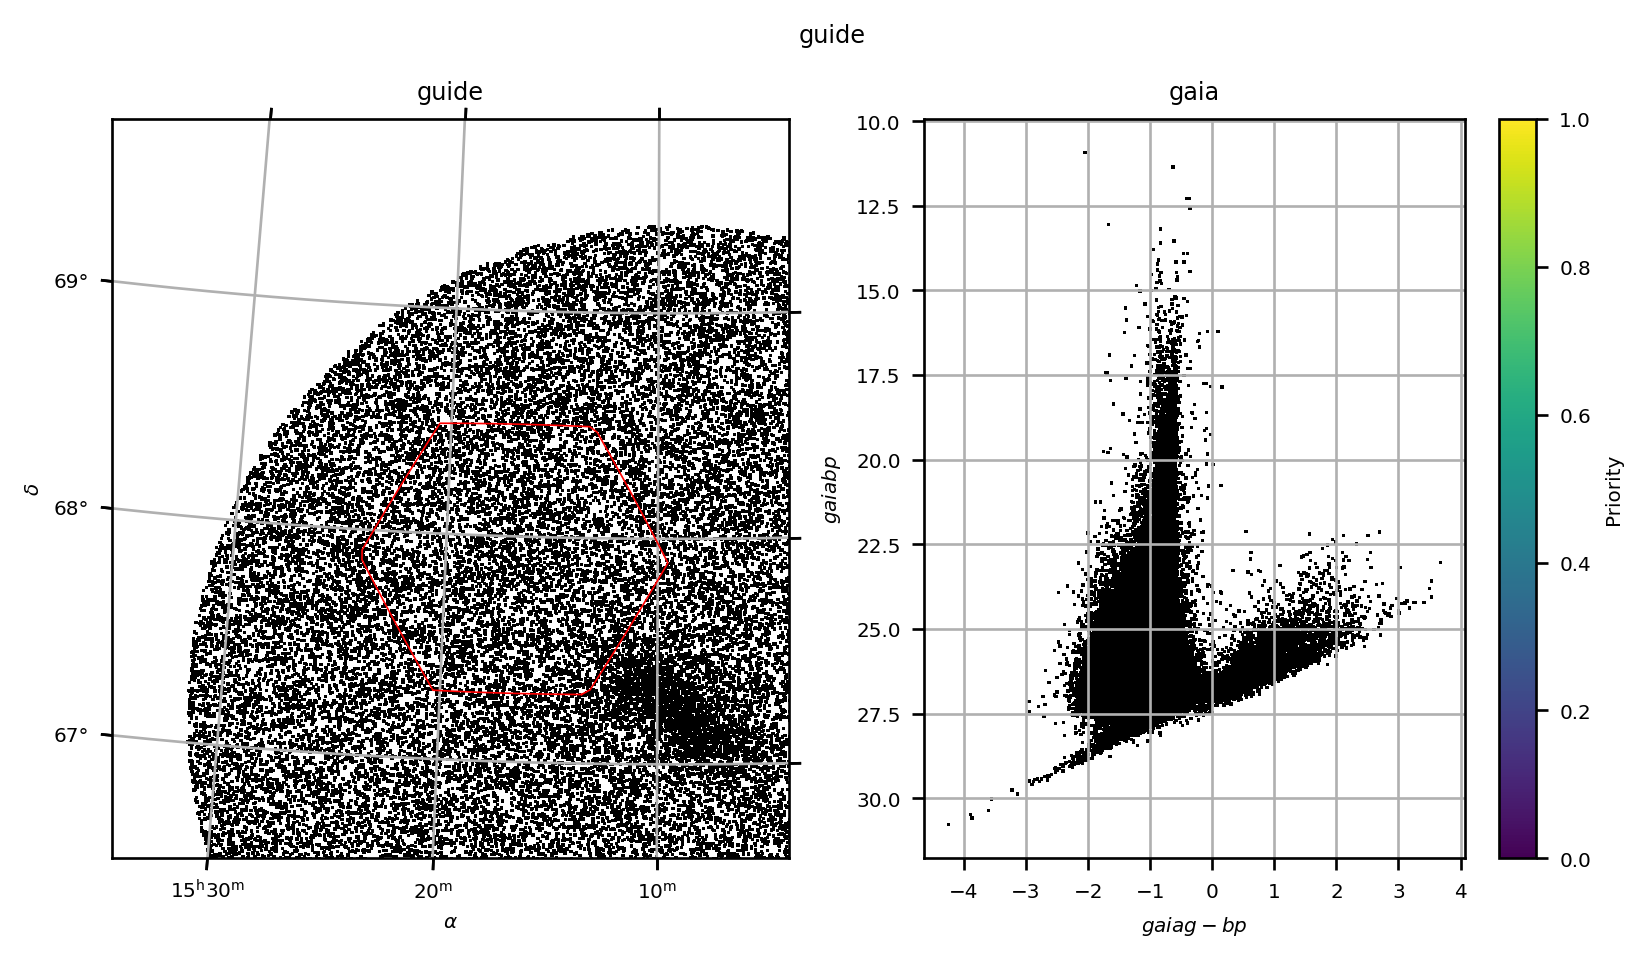

In [15]:
for k in target_lists:
    plot_target_list(target_lists[k], pfi, center, 
                     pointings=pointings)

# Plot magnitude distributions

In [16]:
phot, mags = get_unique_photometry(target_lists)

2025-02-28T13:09:15.341 30 targeting  Extinction correction is not available in catalog `guide` for magnitude `bp`.
2025-02-28T13:09:15.368 30 targeting  Extinction correction is not available in catalog `guide` for magnitude `g`.
2025-02-28T13:09:15.394 30 targeting  Extinction correction is not available in catalog `guide` for magnitude `rp`.
2025-02-28T13:09:15.415 30 targeting  Extinction correction is not available in catalog `hsc` for magnitude `g`.
2025-02-28T13:09:15.436 30 targeting  Extinction correction is not available in catalog `hsc` for magnitude `i`.
2025-02-28T13:09:15.458 30 targeting  Extinction correction is not available in catalog `hsc` for magnitude `nb515`.
2025-02-28T13:09:15.480 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `g`.
2025-02-28T13:09:15.502 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `i`.
2025-02-28T13:09:15.525 30 targeting  Extinction correction is not available

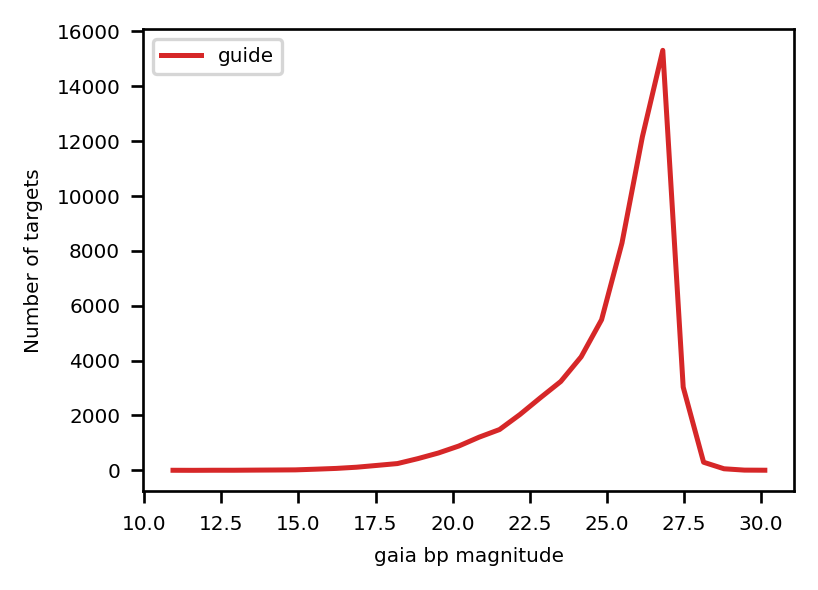

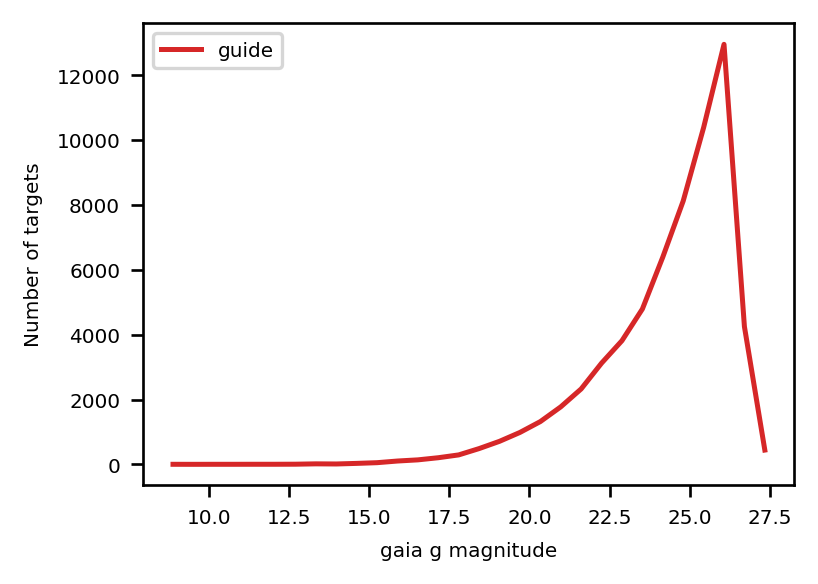

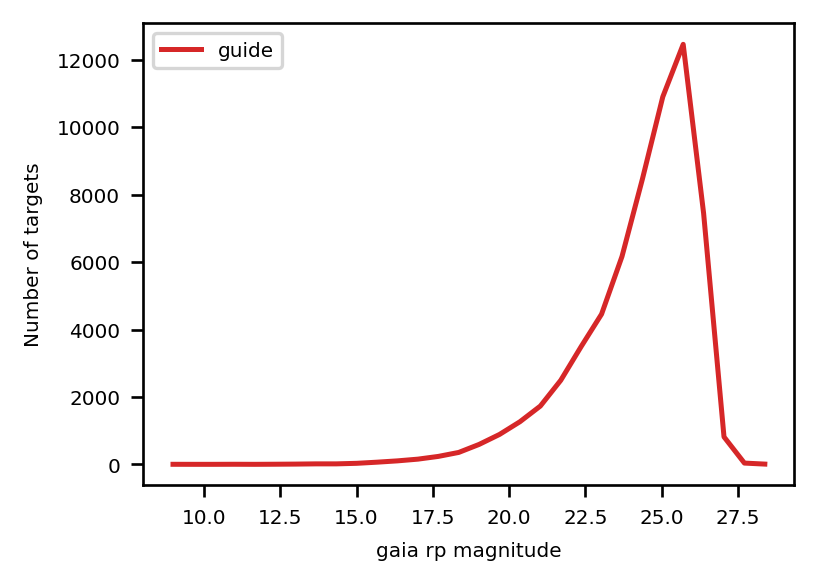

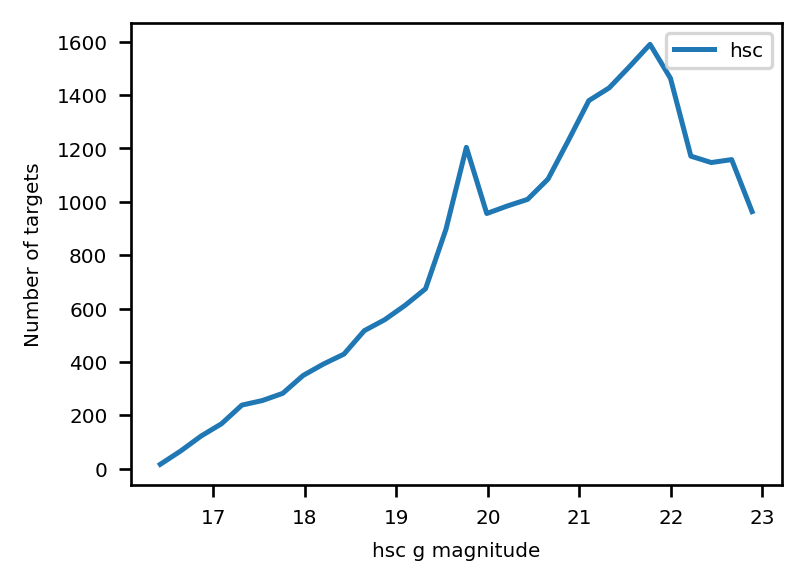

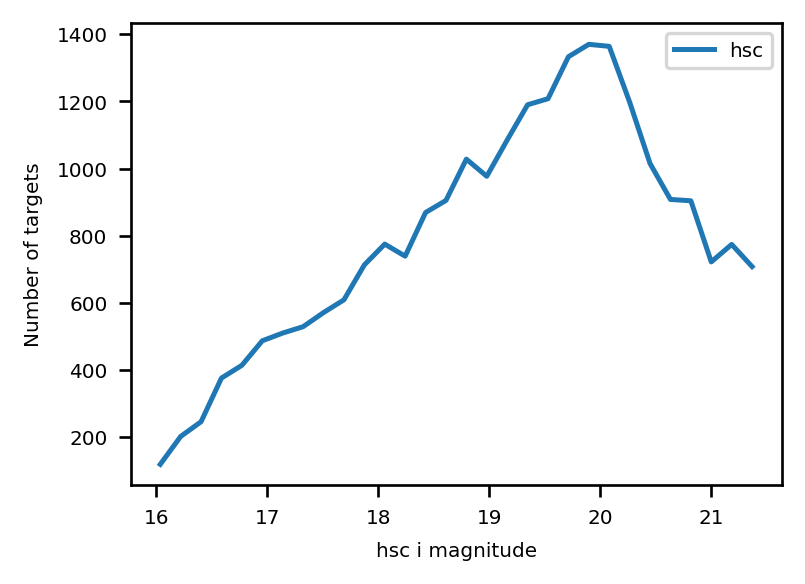

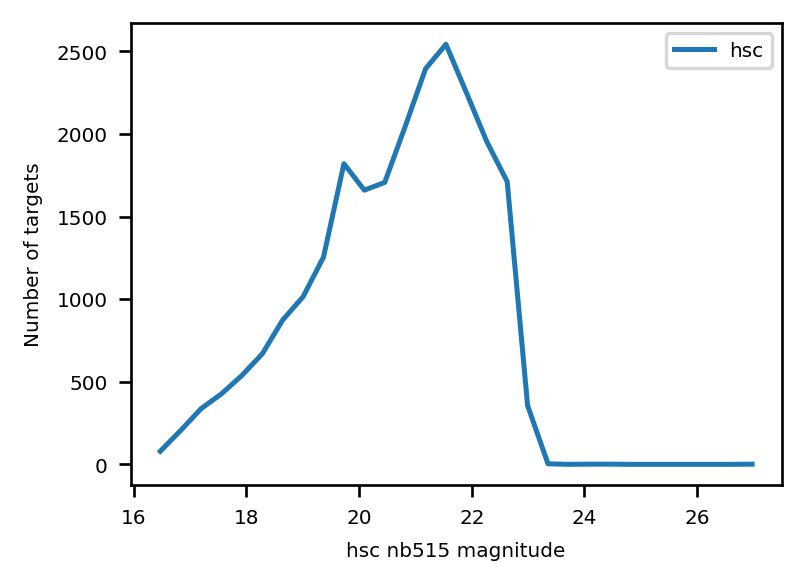

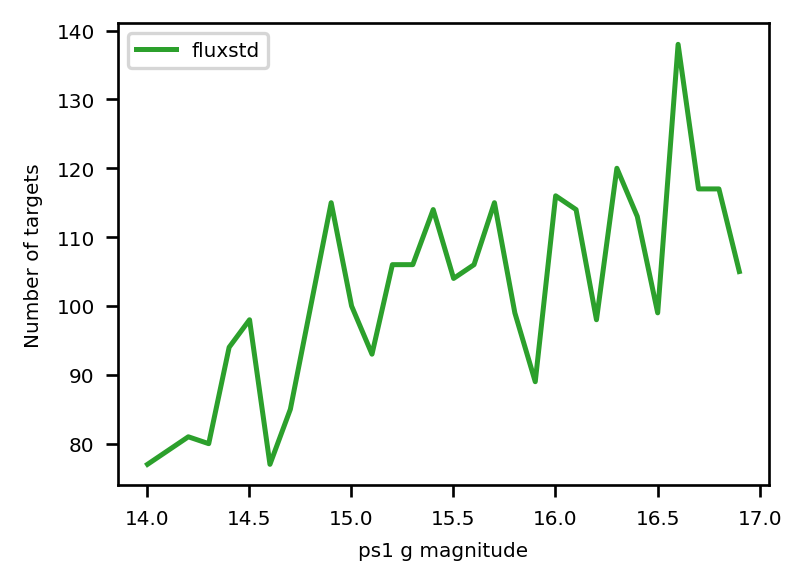

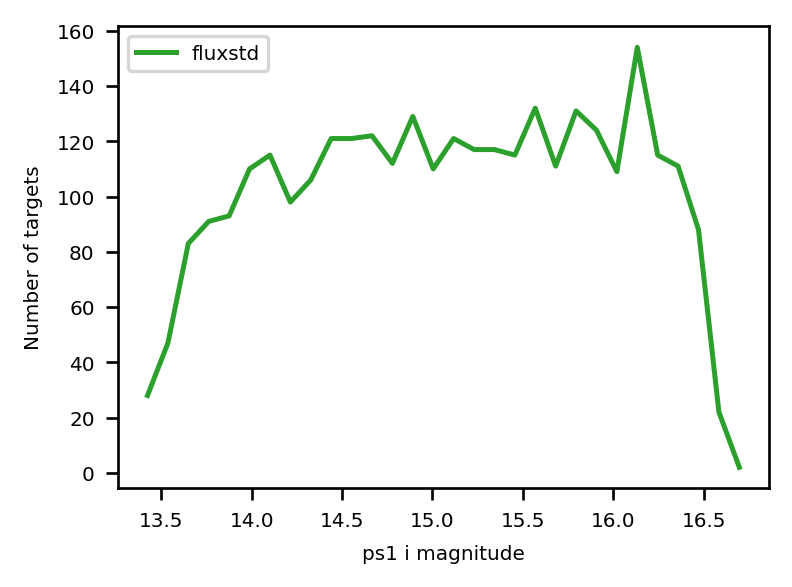

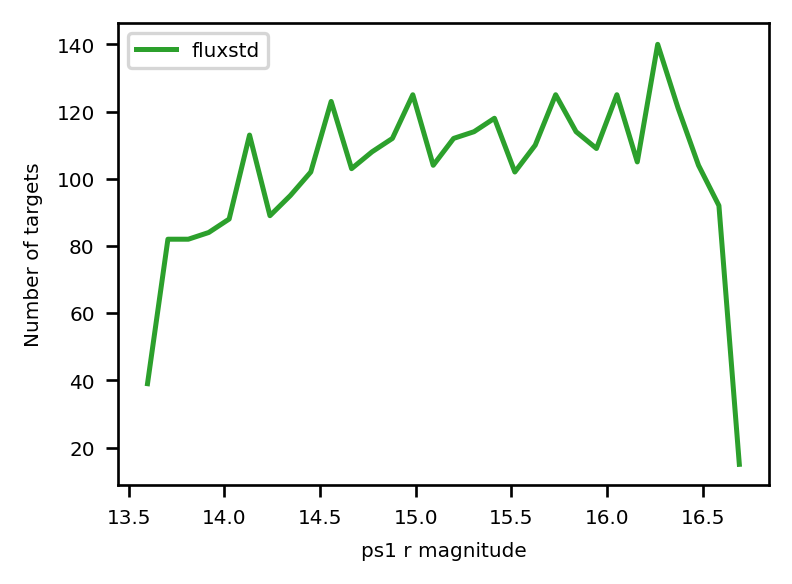

In [17]:
# Plot the magnitude distribution for each target list for each magnitude
plot_magnitude_dist(target_lists, phot, mags)

# Plot parameter distributions

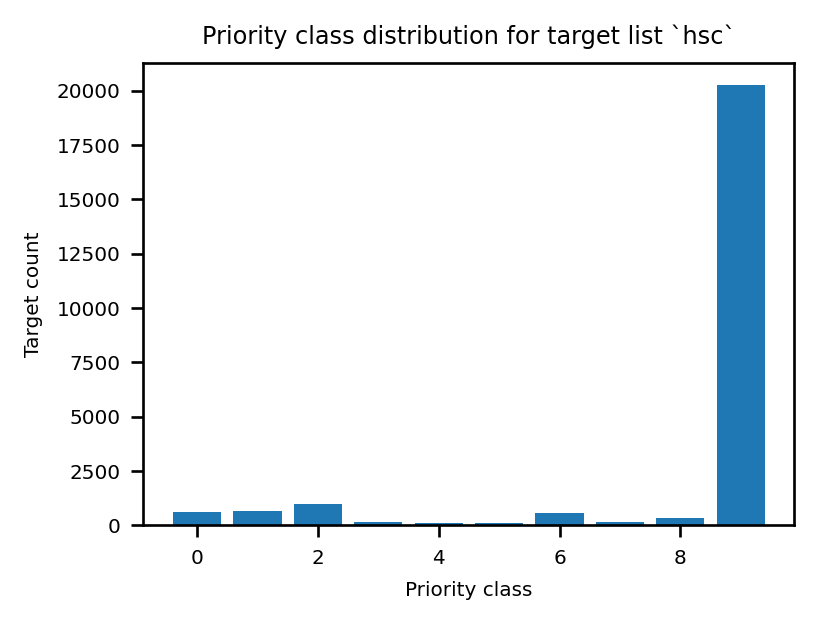

In [18]:
# Plot priority distribution for each target list

for k in config.targets:
    if config.targets[k].prefix in ['sci']:
        plot_priority_dist(target_lists[k])

In [19]:
# We assume that exposure time is the same for all pointings
exp_time = config.pointings[0].exp_time
if exp_time is None:
    exp_time = config.field.exp_time
exp_time

10800.0

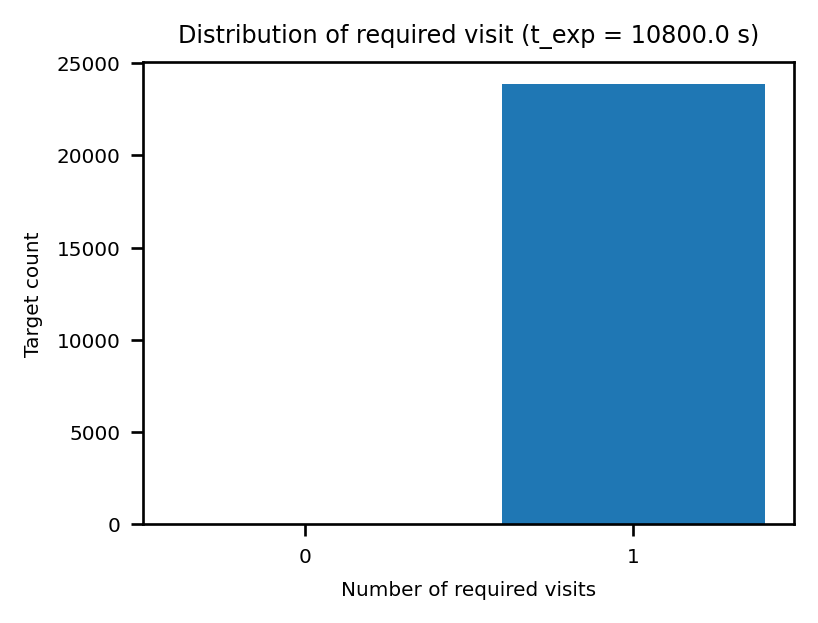

In [20]:
# Plot the distribution of required visits for each target list

for k in config.targets:
    if config.targets[k].prefix in ['sci']:
        plot_required_visits_dist(target_lists[k], exp_time)